<a href="https://colab.research.google.com/github/wjdsheep15/AIStudy/blob/main/Supervised%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip list

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

upload = files.upload()

Saving 사과배복숭아-학습.xlsx to 사과배복숭아-학습.xlsx


In [ ]:
df = pd.read_excel('사과배복숭아-학습.xlsx')
df

,fruit,weight,height,width,hardness,sweet,sour,color
0,복숭아,310.7,76.2,86.3,45.2,12.7,0.35,60.8
1,복숭아,265.9,74.5,81.8,29.5,14.2,0.24,61.0
2,복숭아,407.5,82.6,90.1,34.1,14.3,0.29,68.2
3,복숭아,314.6,74.5,86.1,22.1,14.9,0.28,62.1
4,복숭아,310.7,77.5,85.7,31.1,13.0,0.40,64.6
...,...,...,...,...,...,...,...,...
163,사과,221.3,73.2,80.0,55.8,10.5,0.31,43.6
164,사과,252.2,71.3,84.3,34.5,13.4,0.40,42.6
165,사과,284.3,78.2,88.0,36.2,13.6,0.36,44.8
166,사과,314.3,77.3,91.1,34.1,12.9,0.35,45.7


In [ ]:
df.isna().sum() # 결측치 계산하기

fruit       0
weight      0
height      0
width       0
hardness    0
sweet       0
sour        0
color       0
dtype: int64

In [ ]:
df.fillna(0, inplace=True) #결측치 대신 0을 입력
df.isna().sum()

fruit       0
weight      0
height      0
width       0
hardness    0
sweet       0
sour        0
color       0
dtype: int64

In [ ]:
df['fruit'].value_counts() #과일 기준으로 값이 얼마나 있는지 확인

0    77
1    49
2    42
Name: fruit, dtype: int64

In [ ]:
df.replace({'fruit':{'사과':0, '배':1, '복숭아':2}}, inplace=True) #범주형으로 구분하기 위해 사과 : 0, 배 : 1, 복숭아 : 2
df

,fruit,weight,height,width,hardness,sweet,sour,color
0,2,310.7,76.2,86.3,45.2,12.7,0.35,60.8
1,2,265.9,74.5,81.8,29.5,14.2,0.24,61.0
2,2,407.5,82.6,90.1,34.1,14.3,0.29,68.2
3,2,314.6,74.5,86.1,22.1,14.9,0.28,62.1
4,2,310.7,77.5,85.7,31.1,13.0,0.40,64.6
...,...,...,...,...,...,...,...,...
163,0,221.3,73.2,80.0,55.8,10.5,0.31,43.6
164,0,252.2,71.3,84.3,34.5,13.4,0.40,42.6
165,0,284.3,78.2,88.0,36.2,13.6,0.36,44.8
166,0,314.3,77.3,91.1,34.1,12.9,0.35,45.7


In [ ]:
df.groupby('fruit').mean() # 과일 기준으로 평균을 구함

,weight,height,width,hardness,sweet,sour,color
fruit,,,,,,,
0,291.206494,78.167532,87.055844,43.549351,13.903896,0.310000,52.781818
1,617.228571,96.612245,93.832653,33.234694,12.300000,0.208163,0.000000
2,340.166667,79.159524,88.573810,34.238095,12.466667,0.313810,63.019048


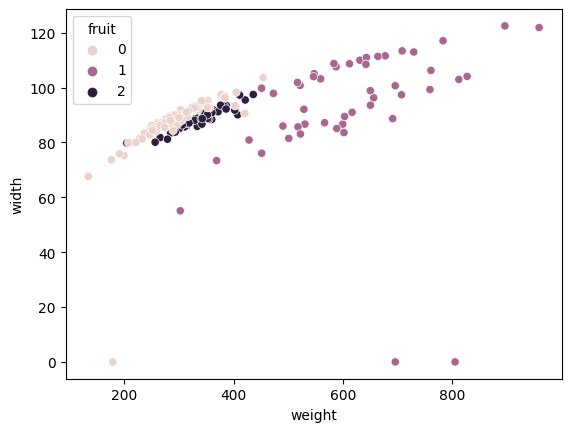

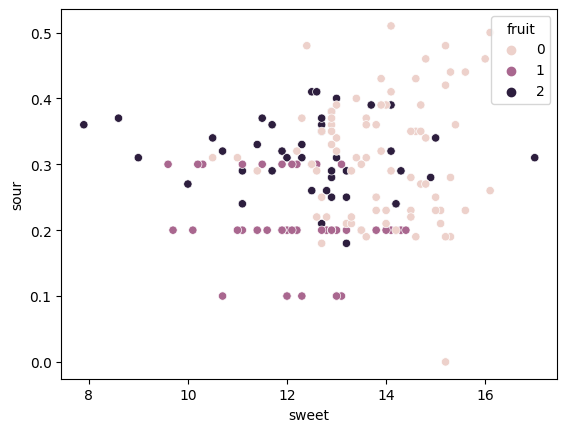

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# scatterplot은 산점도 그래프이다.
sns.scatterplot(data=df, x='weight', y='width', hue='fruit') #hue은 범례이다
plt.show()

sns.scatterplot(data=df, x = 'sweet', y='sour', hue='fruit')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier #의사결정트리

#학습데이터
x_train = df.iloc[:,1:]
y_train = df.iloc[:,0]

#모델링
tr_model = DecisionTreeClassifier(random_state=0) # 학습모델 생성
tr_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
#태스트 데이터 실행
new_fruit = pd.DataFrame([[270.0, 75.0, 85.0, 37.0, 13.5, 0.22, 55.0]], columns = x_train.columns) # 특징벡터
tr_model.predict(new_fruit)
# array([0]) 사과에 가깝다

array([0])

In [ ]:
upload = files.upload()

Saving 사과배복숭아-테스트.xlsx to 사과배복숭아-테스트.xlsx


In [ ]:
df_test = pd.read_excel('사과배복숭아-테스트.xlsx')
df_test.fillna(0, inplace=True)
df_test.replace({'fruit':{'사과':0, '배':1, '복숭아':2}}, inplace=True)
df_test

,fruit,weight,height,width,hardness,sweet,sour,color
0,2,400.5,82.6,90.1,32.1,15.3,0.29,68.2
1,2,310.6,73.5,80.1,20.1,15.0,0.28,62.1
2,2,340.0,75.0,86.7,20.5,14.1,0.32,58.4
3,2,330.0,78.8,85.0,41.5,13.0,0.31,58.6
4,1,680.0,100.0,111.6,36.8,12.0,0.10,0.0
5,1,640.0,99.0,96.3,30.1,12.0,0.20,0.0
6,1,599.6,104.1,86.7,31.5,10.1,0.20,0.0
7,0,319.0,87.0,89.2,57.7,13.3,0.21,56.1
8,0,350.0,89.0,91.8,35.0,13.6,0.31,57.8
9,0,270.0,75.0,85.0,37.0,13.3,0.22,55.6


In [ ]:
x_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,0]

tr_prd = tr_model.predict(x_test)
tr_prd

array([0, 2, 2, 2, 1, 1, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

print('정확도 =', accuracy_score(y_test, tr_prd))
for i in range(len(y_test)):
  print('예측:', tr_prd[i], ' 정답:', y_test.iloc[i])

정확도 = 0.9
예측: 0  정답: 2
예측: 2  정답: 2
예측: 2  정답: 2
예측: 2  정답: 2
예측: 1  정답: 1
예측: 1  정답: 1
예측: 1  정답: 1
예측: 0  정답: 0
예측: 0  정답: 0
예측: 0  정답: 0


* KNN 알고르즘
 - 최근접 이웃 알고르즘

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

upload = files.upload()

Saving 사과배복숭아-학습.xlsx to 사과배복숭아-학습 (1).xlsx


In [ ]:
da = pd.read_excel('사과배복숭아-학습 (1).xlsx')
da.fillna(0, inplace=True)
da.replace({'fruit':{'사과':0, '배':1, '복숭아':2}}, inplace=True)
da

,fruit,weight,height,width,hardness,sweet,sour,color
0,2,310.7,76.2,86.3,45.2,12.7,0.35,60.8
1,2,265.9,74.5,81.8,29.5,14.2,0.24,61.0
2,2,407.5,82.6,90.1,34.1,14.3,0.29,68.2
3,2,314.6,74.5,86.1,22.1,14.9,0.28,62.1
4,2,310.7,77.5,85.7,31.1,13.0,0.40,64.6
...,...,...,...,...,...,...,...,...
163,0,221.3,73.2,80.0,55.8,10.5,0.31,43.6
164,0,252.2,71.3,84.3,34.5,13.4,0.40,42.6
165,0,284.3,78.2,88.0,36.2,13.6,0.36,44.8
166,0,314.3,77.3,91.1,34.1,12.9,0.35,45.7


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

x_train = da.iloc[:,1:]
y_train = da.iloc[:,0]

kn_model = KNeighborsClassifier(n_neighbors=5)
kn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
upload = files.upload()

Saving 사과배복숭아-테스트.xlsx to 사과배복숭아-테스트 (1).xlsx


In [ ]:
da_test = pd.read_excel('사과배복숭아-테스트 (1).xlsx')
da_test.fillna(0, inplace=True)
da_test.replace({'fruit':{'사과': 0, '배':1, '복숭아':2}}, inplace=True)

In [ ]:
x_test = da_test.iloc[:,1:]
y_test = da_test.iloc[:,0]

kn_prd = kn_model.predict(x_test)
kn_prd

array([0, 2, 2, 2, 1, 1, 1, 0, 2, 0])

In [ ]:
from sklearn.metrics import accuracy_score

print('정확도 =', accuracy_score(y_test, kn_prd))
for i in range(len(y_test)):
  print('예측:', kn_prd[i], '정답:', y_test.iloc[i])

정확도 = 0.8
예측: 0 정답: 2
예측: 2 정답: 2
예측: 2 정답: 2
예측: 2 정답: 2
예측: 1 정답: 1
예측: 1 정답: 1
예측: 1 정답: 1
예측: 0 정답: 0
예측: 2 정답: 0
예측: 0 정답: 0


* 랜덤 포레스트 알고리즘

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
upload = files.upload()

Saving 사과배복숭아-학습.xlsx to 사과배복숭아-학습 (2).xlsx


In [ ]:
dc = pd.read_excel('사과배복숭아-학습 (2).xlsx')
dc.fillna(0, inplace=True)
dc.replace({'fruit':{'사과':0, '배':1, '복숭아':2}}, inplace=True)

In [ ]:
upload = files.upload()

Saving 사과배복숭아-테스트.xlsx to 사과배복숭아-테스트 (2).xlsx


In [ ]:
dc_test = pd.read_excel('사과배복숭아-테스트 (2).xlsx')
dc_test.fillna(0, inplace=True)
dc_test.replace({'fruit':{'사과':0, '배':1, '복숭아':2}}, inplace=True)

In [ ]:
xc_train = dc.iloc[:,1:]
yc_train = dc.iloc[:,0]
xc_test = dc_test.iloc[:,1:]
yc_test = dc_test.iloc[:,0]

In [ ]:
tr_model = DecisionTreeClassifier(random_state=0) # 학습모델 생성
tr_model.fit(xc_train, yc_train)
tr_prd = tr_model.predict(xc_test)

In [ ]:
kn_model = KNeighborsClassifier(n_neighbors=5)
kn_model.fit(xc_train, yc_train)
kn_prd = kn_model.predict(xc_test)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=7)
rf_model.fit(xc_train,yc_train)
rf_prd = rf_model.predict(xc_test)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

print("==의사결정 트리 모델==")
print('정확도:', accuracy_score(yc_test, tr_prd))
print('재현율:', recall_score(yc_test, tr_prd, average=None))
print('정밀도:',  precision_score(yc_test, tr_prd, average=None))

print("\n==K 최근접 트리 모델==")
print('정확도:', accuracy_score(yc_test, kn_prd))
print('재현율:', recall_score(yc_test, kn_prd, average=None))
print('정밀도:',  precision_score(yc_test, kn_prd, average=None))

print("\n==랜덤 트리 모델==")
print('정확도:', accuracy_score(yc_test, rf_prd))
print('재현율:', recall_score(yc_test, rf_prd, average=None))
print('정밀도:',  precision_score(yc_test, rf_prd, average=None))

==의사결정 트리 모델==
정확도: 0.9
재현율: [1.   1.   0.75]
정밀도: [0.75 1.   1.  ]

==K 최근접 트리 모델==
정확도: 0.8
재현율: [0.66666667 1.         0.75      ]
정밀도: [0.66666667 1.         0.75      ]

==랜덤 트리 모델==
정확도: 1.0
재현율: [1. 1. 1.]
정밀도: [1. 1. 1.]
